In [1]:
import ai2thor
import copy
import time
import random
import ai2thor.controller
from datetime import datetime
import cv2
import os
import matplotlib.pyplot as plt
import os
# from utils.mid_level_constants import  scene_start_cheating_init_pose
from jupyter_helper import ENV_ARGS, initialize_arm, only_reset_scene, transport_wrapper, ADITIONAL_ARM_ARGS, execute_command

screen_size=900

ENV_ARGS['width'] = screen_size
ENV_ARGS['height'] = screen_size
controller = ai2thor.controller.Controller(**ENV_ARGS, renderDepthImage=True)
controller._build.url

'http://s3-us-west-2.amazonaws.com/ai2-thor-public/builds/thor-Linux64-b762f5c3ff289cc3eb8aa2461dd036b4e633de67.zip'

In [21]:
import elements
import numpy as np

all_moves = {
    'MoveArmHeightM': 'j',
    'MoveArmHeightP': 'u',
    'MoveArmXM': 'a',
    'MoveArmXP': 's',
    'MoveArmZM': 'z',
    'MoveArmZP': 'w',
    'MoveArmYM': '4',
    'MoveArmYP': '3',
    'MoveAhead': 'm',
    'RotateRight': 'r',
    'RotateLeft': 'l',
    '':'',
    'Done':'q',
    'PickUp':'p', 
    'Finish': 'q',
    'Drop': 'd',
}
#print(list(all_moves.keys()))
all_moves = list(all_moves.keys())
els = elements.Space(np.int32, (), 0, len(all_moves))
#print(els.sample())
#action = all_moves[els]
#print(action)

def translate(action):
    translation = {
        'MoveArmHeightM': 'j',
        'MoveArmHeightP': 'u',
        'MoveArmXM': 'a',
        'MoveArmXP': 's',
        'MoveArmZM': 'z',
        'MoveArmZP': 'w',
        'MoveArmYM': '4',
        'MoveArmYP': '3',
        'MoveAhead': 'm',
        'RotateRight': 'r',
        'RotateLeft': 'l',
        '':'',
        'Done':'q',
        'PickUp':'p', 
        'Finish': 'q',
        'Drop': 'd',
    }
    return translation[action]

def run_action_sequence(controller, action_sequence, object_id=None, target_location=None, logger_number=0, translated=False, seq_num_start = 0):
    picked_up = False
    if translated:
        translated_sequence = action_sequence
    else:
        translated_sequence = [translate(action) for action in action_sequence if action != '']
    for (seq_number, seq) in enumerate(translated_sequence):
        execute_command(controller, seq,ADITIONAL_ARM_ARGS)
                
def manual_task(scene_name, logger_number =0, final=False):
    only_reset_scene(controller, scene_name)
    all_actions = []
    actions_ran_so_far = 0
    while(True):
        #action = input()
        action = all_moves[els.sample()]
        print(action)
        action = translate(action)
        if action == 'q':
            break
        all_actions.append(action)
        
        run_action_sequence(controller, [action], 
                            logger_number=logger_number, translated=True, seq_num_start=actions_ran_so_far)
        actions_ran_so_far += 1
        plt.cla()
        plt.imshow(controller.last_event.frame)
        plt.show()
        
    print(scene_name)
    print(all_actions)

RotateLeft


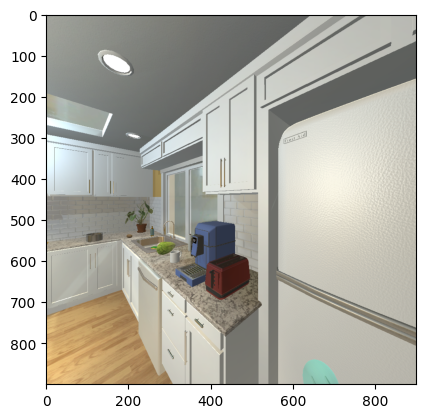

MoveArmHeightM


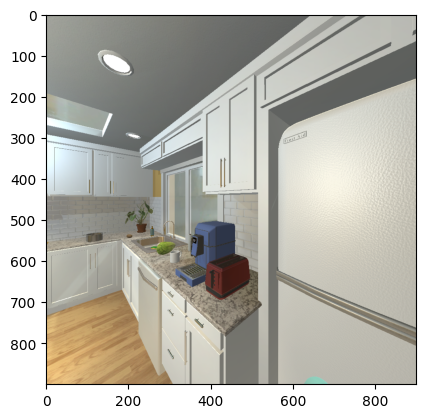

MoveArmYM


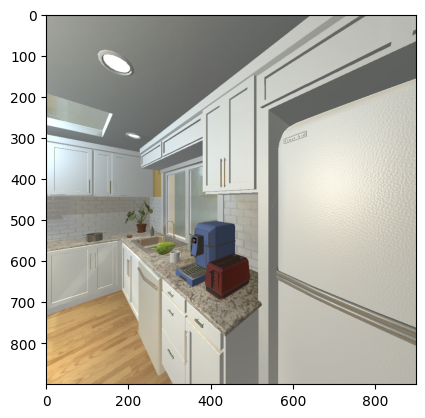

MoveArmYP


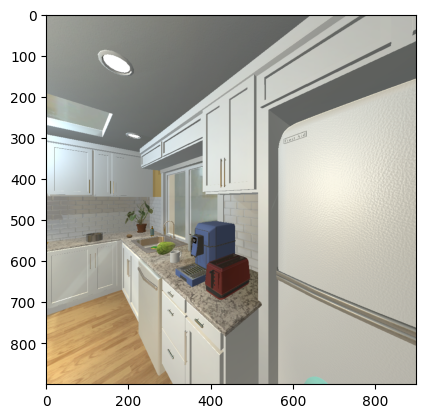

MoveArmHeightM


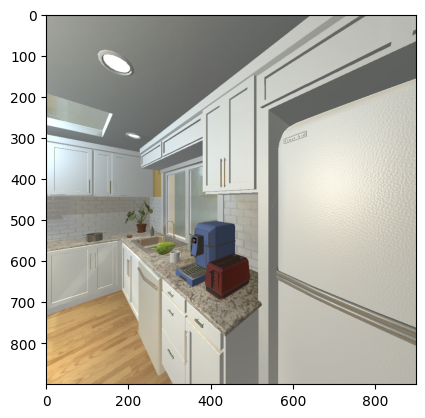

RotateLeft


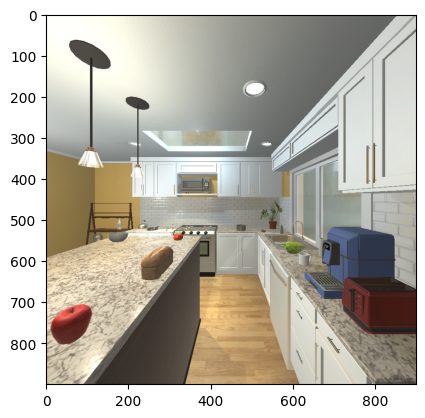

RotateRight


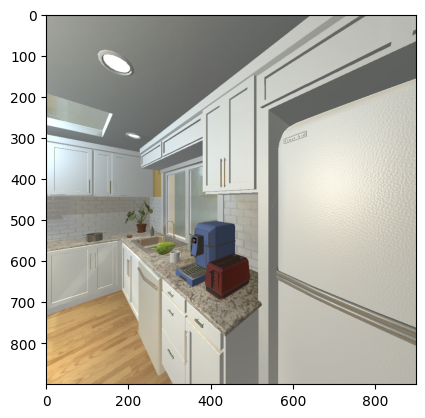

RotateLeft


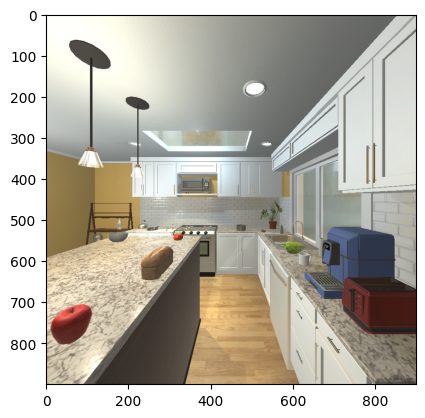

MoveArmXP


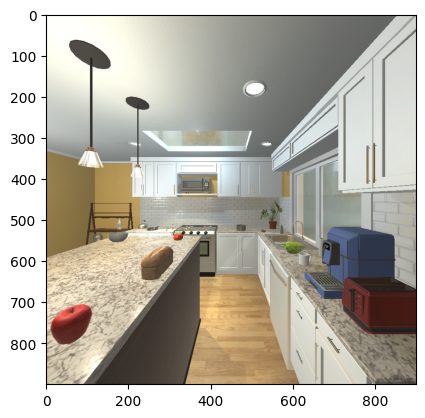

RotateLeft


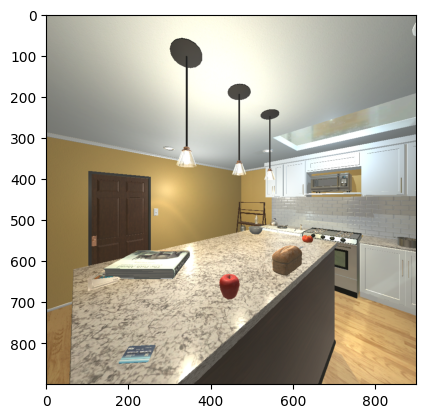

MoveArmXM


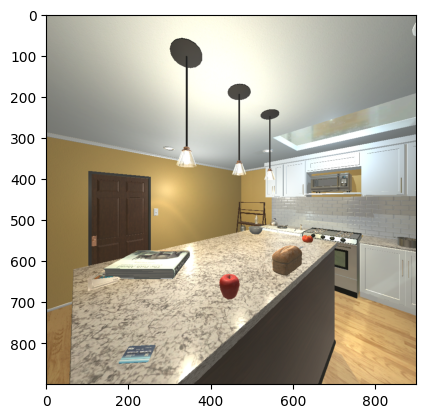

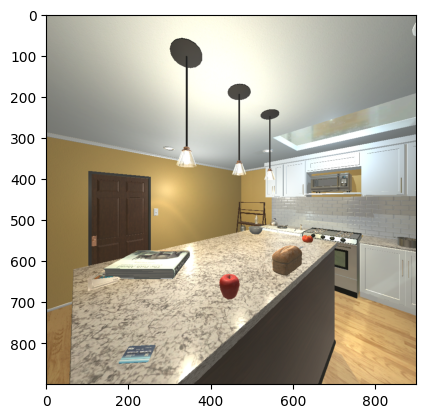

MoveArmXP


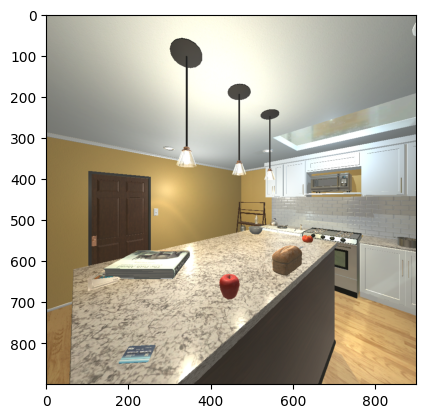

Finish
FloorPlan1_physics
['l', 'j', '4', '3', 'j', 'l', 'r', 'l', 's', 'l', 'a', '', 's']


In [24]:
manual_task(scene_name='FloorPlan1_physics')